In [3]:
import pandas as pd 
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,20]
from sklearn.cluster import SpectralClustering
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
import seaborn as sns

In [4]:
data = pd.read_csv('clustering_R3.csv')


Dodanie normalizacji danych. Wszyskie dalsze działania są przeprowadzane dla danych znormalizowanych.

In [12]:
# Normalizacja Danych 
data = preprocessing.normalize(data, norm='l2')
data=pd.DataFrame(data)
data.columns = ['X1','X2','X3']

In [13]:
data

,X1,X2,X3
0,0.609300,0.792928,0.004390
1,0.584238,0.811508,0.010996
2,0.617263,0.786753,0.002543
3,0.588126,0.808765,0.002685
4,0.589319,0.807779,0.013983
...,...,...,...
995,0.960135,0.279013,0.017084
996,0.954009,0.297903,0.033477
997,0.969515,0.244072,0.021670
998,0.956678,0.290592,0.017987


Porównanie metod klasteryzacji
====
Do porównania użyję sugerowanych metryk:

- Współczynnik Silhouette
- Indeks Calińskiego-Harabasza
- Indeks Daviesa–Bouldina

Porównywanymi algorytmami będą dwie metody klasteyzacji pochodzące z pakietu sklearn:

- DBSCAN
- Spectral clustering

Zadanie należało by rozpocząć od wizualizacji niesklasteryzowanych danych:


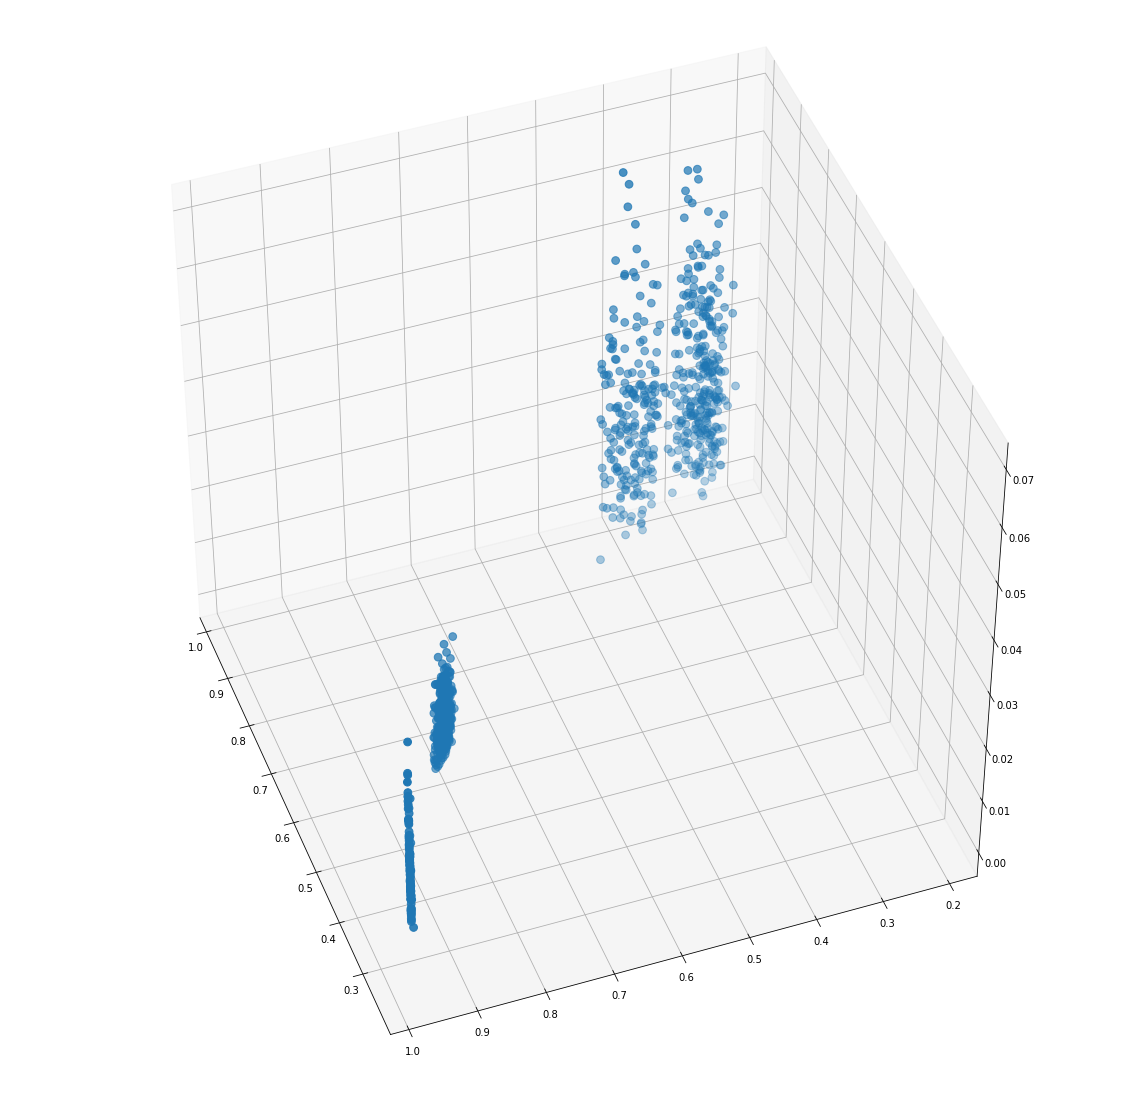

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['X1'], data['X2'], data['X3'], s=60)
ax.view_init(45, 160)
plt.show()
  


Wydaje się, że dane zawierają 3 klastry sprawdzę, jak ta początkowa obserwacja ma się do wyników pracy wybranych algorytmów.

# Opis wybranych metryk 

### Współczynnik Silhouette: 
Definiowany dla każdej obserwacji jako:\
$s=\frac{b-a}{max(a,b)}$\
Gdzie:

- a – średnia odległość danej obserwacji od wszystkich innych obserwacji w grupie
- b – średnia odległość danej obserwacji od wszystkich innych obserwacji w innej najbliższej grupie
- max(a,b) – większa wartość z wartości a i b.

Aby obliczyć współczynnik dla całej próbki należy po prostu obliczyć średnią.
Sytuacja korzystna to wysoki współczynnik ponieważ jeśli b>>a mamy dobre dopasowanie grup.

### Indeks Calińskiego-Harabasza:
Definiowany jako:\
$\frac{SS_B}{SS_W}\times\frac{N-k}{k-1}$\
Gdzie:

- k – liczba klastrów
- N – liczba obserwacji w zbiorze 
- $SS_W$ – łączna warjancja wewnątrz klastrów (suma)
- $SS_B$ – łączna warjancja między klastrami 

Sytuacja korzystna to wysoka wartość indeksu (mała wariancja wewnątrz klastrów, duża pomiędzy klastrami).

### Indeks Daviesa–Bouldina
Miara jest definiowana jako średnie podobieństwo między najbliższymi klastrami. Podobieństwo obliczane jako stosunek odległości wewnątrz klastra do odległości  między punktami klastra, a punktami najbliższego klastra. Sytuacja korzystna to niskie wartości indeksu DB.



In [41]:
# Funkcje obiczająca wartości metryk (algorytm SpectralClustering)

def metric_value_sc(data,sk,ek):
    
    results_Si = []
    results_CH = []
    results_DB = []
    for i in range(sk,ek+1):
        # testowałem również dla rfb ale wyniki były tragiczne 
        label = SpectralClustering(n_clusters=i,affinity='nearest_neighbors',random_state=123).fit(data).labels_
        results_Si.append(metrics.silhouette_score(data,label,metric='euclidean'))
        results_CH.append(metrics.calinski_harabasz_score(data,label))
        results_DB.append(metrics.davies_bouldin_score(data,label))
    # creating result df 
    result = pd.DataFrame({'k':[i for i in range(sk,ek+1)],'SI':results_Si,'CH':results_CH,'DB':results_DB})
    return result
    

In [42]:
result_SC=metric_value_sc(data,2,20)

/home/jan/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/jan/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/jan/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/jan/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/ja

W przypadku algorytmu DBSCAN parametr n_clusters zostaje w pewnym sensie zastąpiony przez parametr eps informujący 
o maksymalnej możliwej odległości między punktami, dla której są one rozpatrywane przez algorytm jako sąsiedzi.

In [43]:
result_SC # Patrząc na błędy nie należy się spodziewać zbyt dobrego wyniku. 


,k,SI,CH,DB
0,2,0.402183,447.414150,0.498963
1,3,0.753276,5949.098838,0.359338
2,4,0.340450,4221.002209,1.307965
3,5,0.370636,3508.606773,1.317827
4,6,0.261992,2851.482884,1.306133
5,7,0.513367,55286.511687,0.638985
6,8,0.487876,51590.820157,0.657876
7,9,0.525410,38035.246848,0.651098
8,10,0.448617,49417.741318,0.717272
9,11,0.419616,50599.562324,0.749723


In [34]:
# Funkcja dla DBSCAN 
def metric_value_DB(data,se,ee,step):
    
    results_Si = []
    results_CH = []
    results_DB = []
    for i in range(se,ee+1,step):
    
        label = DBSCAN(eps=i/100).fit(data).labels_
        results_Si.append(metrics.silhouette_score(data,label,metric='euclidean'))
        results_CH.append(metrics.calinski_harabasz_score(data,label))
        results_DB.append(metrics.davies_bouldin_score(data,label))
    # creating result df 
    result = pd.DataFrame({'eps':[i/100 for i in range(se,ee+1,step)],'SI':results_Si,'CH':results_CH,'DB':results_DB})
    return result
result_DB =metric_value_DB(data,1,30,1)

In [20]:
result_DB # Nie widać wyraźnych różnic.

,eps,SI,CH,DB
0,0.01,0.644725,6521.040971,1.298445
1,0.02,0.856898,13536.178220,9.949592
2,0.03,0.888461,20324.271084,0.132243
3,0.04,0.888461,20324.271084,0.132243
4,0.05,0.888461,20324.271084,0.132243
5,0.06,0.888461,20324.271084,0.132243
6,0.07,0.888461,20324.271084,0.132243
7,0.08,0.888461,20324.271084,0.132243
8,0.09,0.888461,20324.271084,0.132243
9,0.10,0.888461,20324.271084,0.132243


# Porównanie metod klasteryzacji 
### Współczynnik Silhouette:

/home/jan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


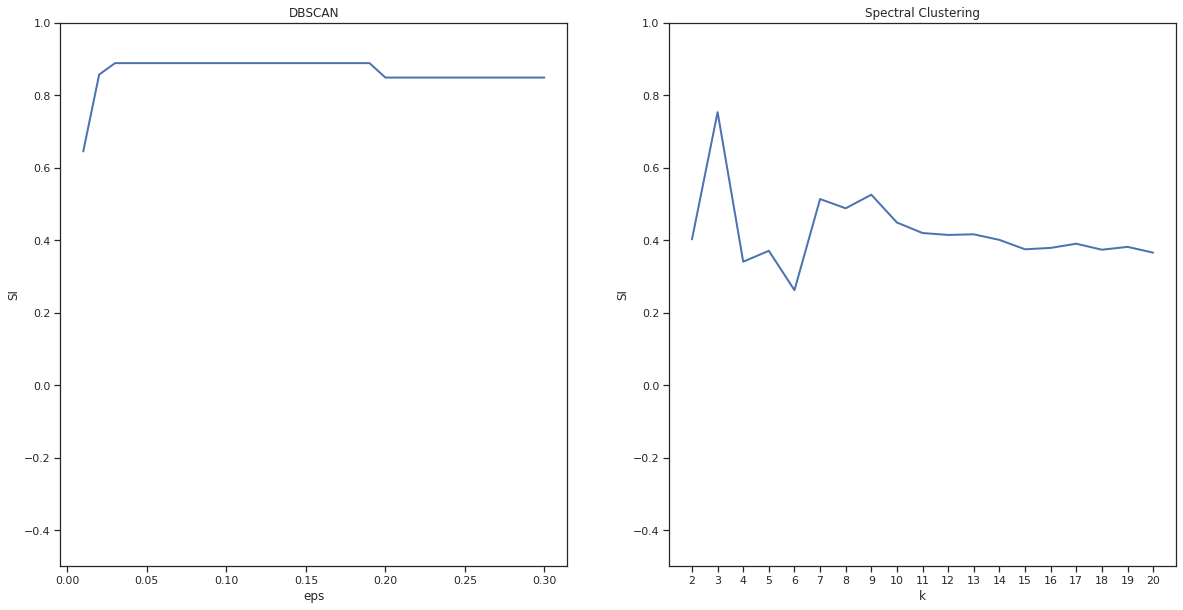

In [45]:
plt.rcParams['figure.figsize'] = [20,10]

fig, ax =plt.subplots(1,2)
sns.set(style="ticks", rc={"lines.linewidth": 2})

a1=sns.lineplot(data=result_SC,x='k',y='SI', ax=ax[1],).set_title('Spectral Clustering')
a1.axes.set_ylim(-0.5,1)
plt.xticks(result_SC.k)
a2=sns.lineplot(data=result_DB,x='eps',y='SI', ax=ax[0]).set_title('DBSCAN')
a2.axes.set_ylim(-0.5,1)
fig.show()

Maksymalne wyniki uzyskany przez oba algorytmy są zbliżone. Prawdopodobie dotyczą on zbliżonego podziału na klastry. Warto zauważyć, że algorytm DBSCAN okazał się także znacznie bardzej stabilny (skoki na wykresie prawdopodobnie korespondują z zmianą przypisania do klastrów). Wynik SC potwierdza również hipotezę o 3 klastrach.  
# Indeks Calińskiego-Harabaszauzyskał

/home/jan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


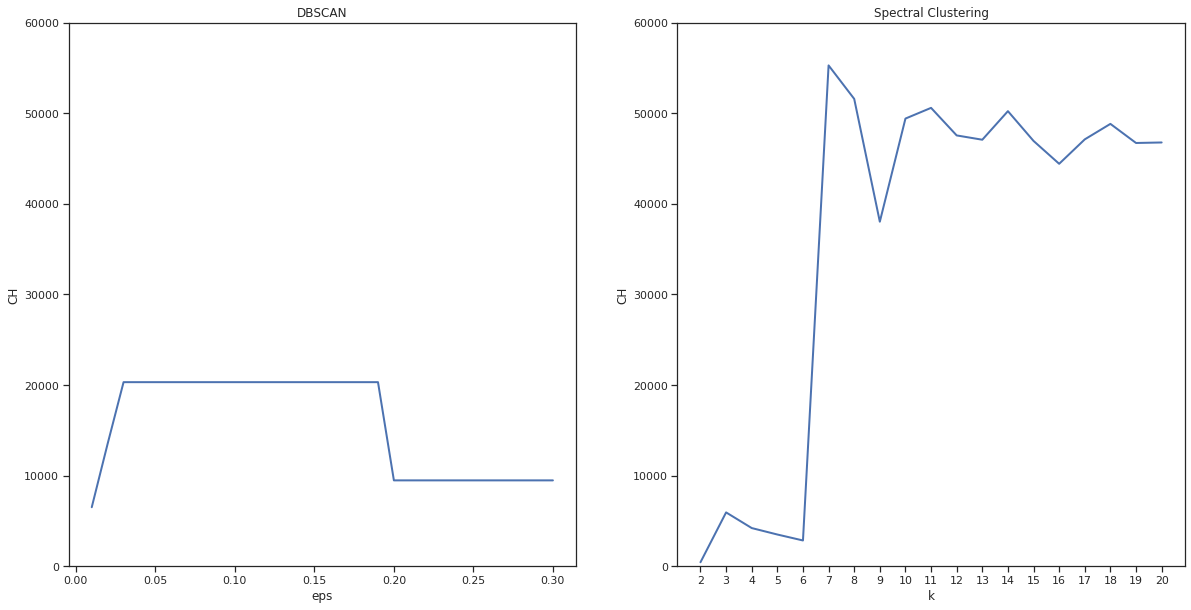

In [46]:
plt.rcParams['figure.figsize'] = [20,10]

fig, ax =plt.subplots(1,2)
sns.set(style="ticks", rc={"lines.linewidth": 2})

a1=sns.lineplot(data=result_SC,x='k',y='CH', ax=ax[1],).set_title('Spectral Clustering')
a1.axes.set_ylim(0,60000)
plt.xticks(result_SC.k)
a2=sns.lineplot(data=result_DB,x='eps',y='CH', ax=ax[0]).set_title('DBSCAN')
a2.axes.set_ylim(0,60000)
fig.show()

W przypadku indeksu CH wyniki są dość zaskakujące. DBSCAN ponownie uzyskuje wysoki i stabilny wynik. Rezultat dla SC jest jednak w najlepszym wypadku prawie trzy krotnie wyższy niż dla DBSCAN. Podejżewam, że poniewasz ten fenomen nie ma odzwiercedlenia w innych metrykach może wynikać ze specyfiki wybrangeo indeksu. Warto również dodać, że wysokie wyniki SC uzyskuje powyżej sześciu klastrów.
# Indeks Daviesa–Bouldina

/home/jan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


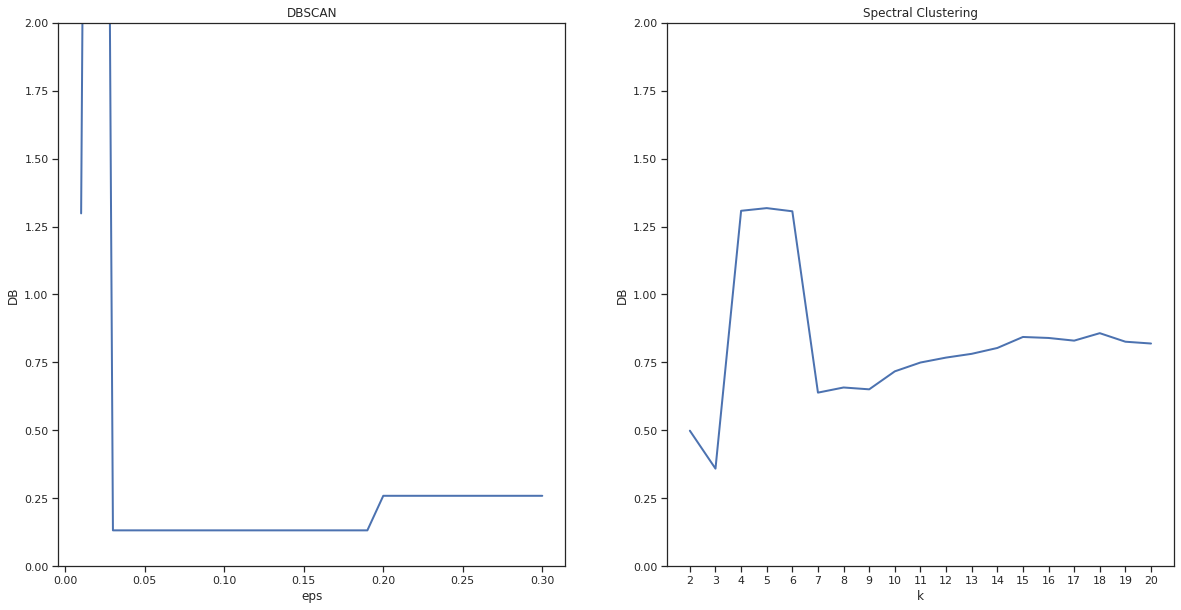

In [48]:
fig, ax =plt.subplots(1,2)
sns.set(style="ticks", rc={"lines.linewidth": 2})

a1=sns.lineplot(data=result_SC,x='k',y='DB', ax=ax[1],).set_title('Spectral Clustering')
a1.axes.set_ylim(0,2)
plt.xticks(result_SC.k)
a2=sns.lineplot(data=result_DB,x='eps',y='DB', ax=ax[0]).set_title('DBSCAN')
a2.axes.set_ylim(0,2)
fig.show()

W trzeciej  metryce wygrywa algorytm DBSCAN ponownie zachowująć stabilność. Tym razem najlepszy wynik dla algorytmu SC przypadł ponownie na 3 klastry.
# Porównanie klasteryzacji
Wybiorę parametr etc=0.10 ponieważ we wszystkich badanych miarach uzyskał najlepsze razultaty. W wypadku algorytmu SC wykożystam podział na trzy klastry na co wskazały dwie z trzech badanych miar. 
### Podział dla DBSCAN


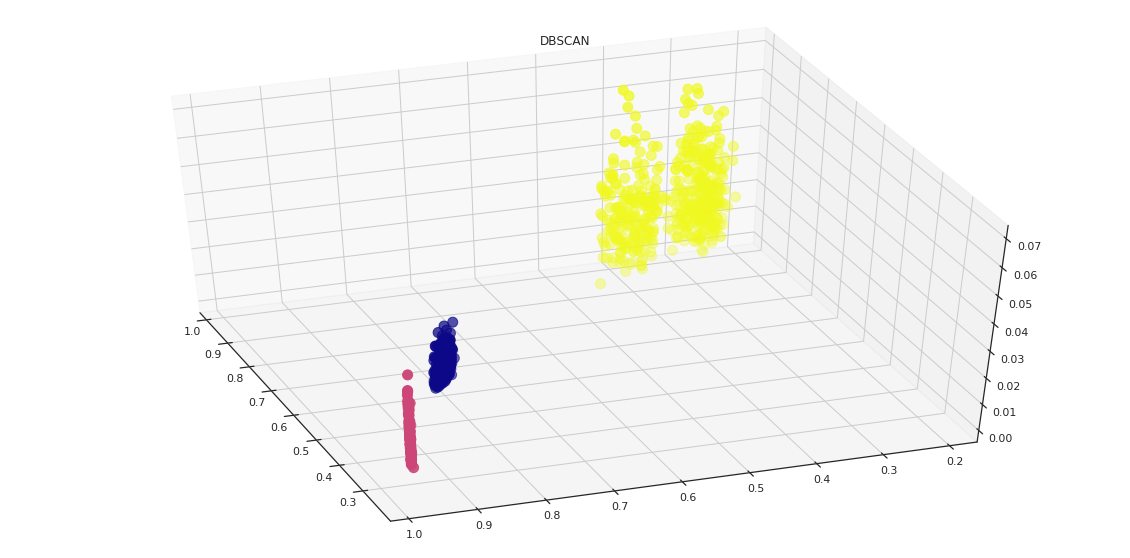

In [55]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['X1'], data['X2'], data['X3'],c=DBSCAN(eps=0.1).fit(data).labels_,cmap="plasma",s=100)
ax.view_init(45, 160)
ax.axes.set_title('DBSCAN')
plt.show()
  

Podział wydaje się sensowny potwierdza również spostrzeżenie o trzech klastrach.
###  SC 

/home/jan/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


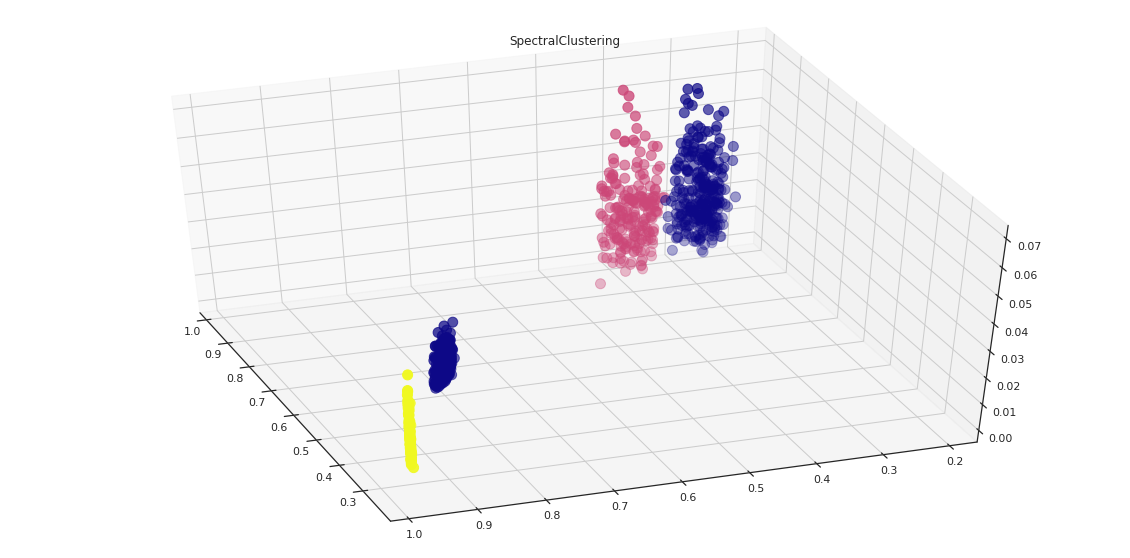

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['X1'], data['X2'], data['X3'],c=SpectralClustering(n_clusters=3,affinity='nearest_neighbors').fit(data).labels_,cmap="plasma",s=100)
ax.view_init(45, 160)
ax.axes.set_title('SpectralClustering')
plt.show()

  

Tym razem uzyskany wynik wydaje się nie mieć sensu. W bardzo dziwny sposób przypisując jeden z klastrów.
### Podział SC dla 7 klastrów

/home/jan/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


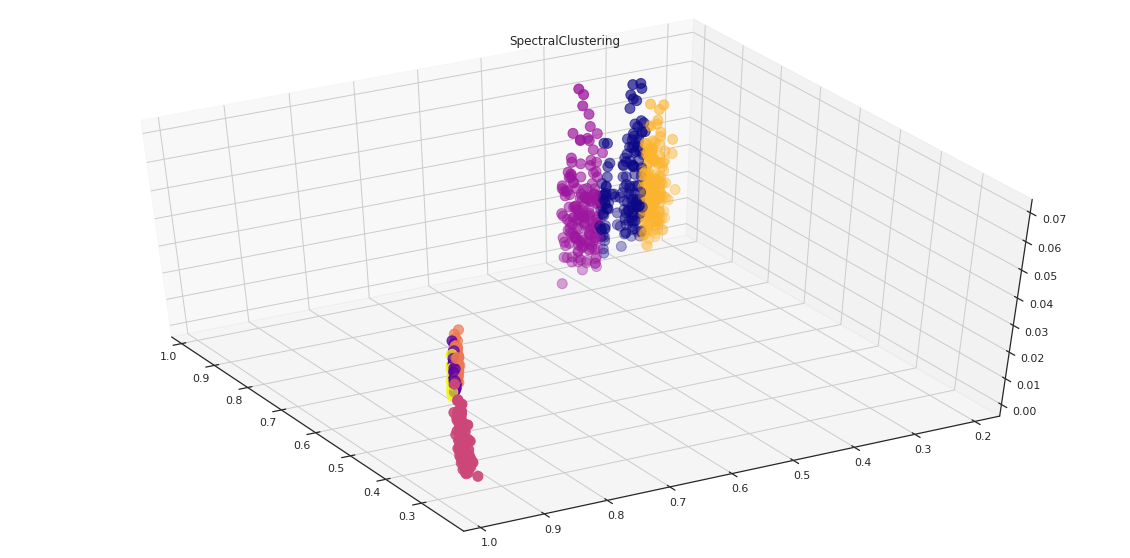

In [61]:
# Najwyższa miara CH jest uzyskiwana dla :
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['X1'], data['X2'], data['X3'],c=SpectralClustering(n_clusters=7,affinity='nearest_neighbors').fit(data).labels_,cmap="plasma",s=100)
ax.view_init(45, 150)
ax.axes.set_title('SpectralClustering')
plt.show()


Podział również zupełnie bez sensowny.

# Podsumowanie 

Kierując się wyłącznie matematyką w dwóch z trzech metryk lepszy wynik uzyskał DBSCAN. Trzecia rozważana metryka co prawda faworyzuję SC ale po zobaczeniu podziału wydaje sie to być raczej mylące. DBSCAN był też dużo stabilniejszy niż SC. Dodatkowym atutem tego algorytmu jest fakt działania bez ustalonej liczby klastrów. 
Ostatnim faktem przemawiającym za DBSCAN jest reprodukowalność gdzie w wypadku SC wyniki mocno zależały od ustawionego ziarna.